Anomalies in the stock market are important because they can indicate opportunities or risks. For example, a sudden spike in a stock’s price could be due to positive news about the company or its industry, which signals a potential investment opportunity. Conversely, an unexpected price drop could warn of underlying issues or market sentiment changes, which signals a risk that investors may need to manage.

Below is the process we can follow for the task of stock market anomaly detection:

Gather historical stock market data, including prices (open, high, low, close, adjusted close) and trading volumes.
Develop additional features that may help in detecting anomalies, such as moving averages, relative strength index (RSI), or percentage changes over specific periods.
Visualize the data to identify potential outliers or unusual patterns across time.
Employ statistical methods like Z-score analysis, where data points that are a certain number of standard deviations away from the mean are flagged as anomalies.
Use the insights gained from anomaly detection to inform investment decisions, risk management, and strategic planning.
I will collect real-time stock market data for this task using the yfinance API.

Collecting Real-time Stock Market Data using Python
Before getting started with Stock Market Anomaly Detection, I’ll collect real-time stock market data of several companies. I’ll use the yfinance API for this task. If you haven’t used it before, you can install it on your Python virtual environment by using the command mentioned below on your terminal or the command prompt:

In [16]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [17]:
#Below is how we can collect real-time stock market data using Python:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta

# define the time period for the data
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

# list of stock tickers to download
tickers = ['AAPL', 'MSFT', 'NFLX', 'GOOG', 'TSLA']

data = yf.download(tickers, start=start_date, end=end_date, progress=False)

# reset index to bring Date into the columns for the melt function
data = data.reset_index()

# melt the DataFrame to make it long format where each row is a unique combination of Date, Ticker, and attributes
data_melted = data.melt(id_vars=['Date'], var_name=['Attribute', 'Ticker'])

# pivot the melted DataFrame to have the attributes (Open, High, Low, etc.) as columns
data_pivoted = data_melted.pivot_table(index=['Date', 'Ticker'], columns='Attribute', values='value', aggfunc='first')

# reset index to turn multi-index into columns
stock_data = data_pivoted.reset_index()

print(stock_data.head())

Attribute       Date Ticker   Adj Close       Close        High         Low  \
0         2023-06-26   AAPL  184.291275  185.270004  188.050003  185.229996   
1         2023-06-26   GOOG  118.954628  119.089996  122.720001  118.989998   
2         2023-06-26   MSFT  326.049438  328.600006  336.109985  328.489990   
3         2023-06-26   NFLX  415.940002  415.940002  430.959991  414.899994   
4         2023-06-26   TSLA  241.050003  241.050003  258.369995  240.699997   

Attribute        Open       Volume  
0          186.830002   48088700.0  
1          121.466003   23185000.0  
2          333.720001   21520600.0  
3          422.440002    4640000.0  
4          250.070007  179990600.0  


Now, let’s make some necessary transformations in the dataset before moving forward:

In [18]:
# convert the 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# set the 'Date' column as the index of the dataframe
stock_data.set_index('Date', inplace=True)
print(stock_data.head())

Attribute  Ticker   Adj Close       Close        High         Low        Open  \
Date                                                                            
2023-06-26   AAPL  184.291275  185.270004  188.050003  185.229996  186.830002   
2023-06-26   GOOG  118.954628  119.089996  122.720001  118.989998  121.466003   
2023-06-26   MSFT  326.049438  328.600006  336.109985  328.489990  333.720001   
2023-06-26   NFLX  415.940002  415.940002  430.959991  414.899994  422.440002   
2023-06-26   TSLA  241.050003  241.050003  258.369995  240.699997  250.070007   

Attribute        Volume  
Date                     
2023-06-26   48088700.0  
2023-06-26   23185000.0  
2023-06-26   21520600.0  
2023-06-26    4640000.0  
2023-06-26  179990600.0  


stock market anomaly detection with a visualization of the adjusted close prices and volumes for each ticker over time to get an overview of the data:

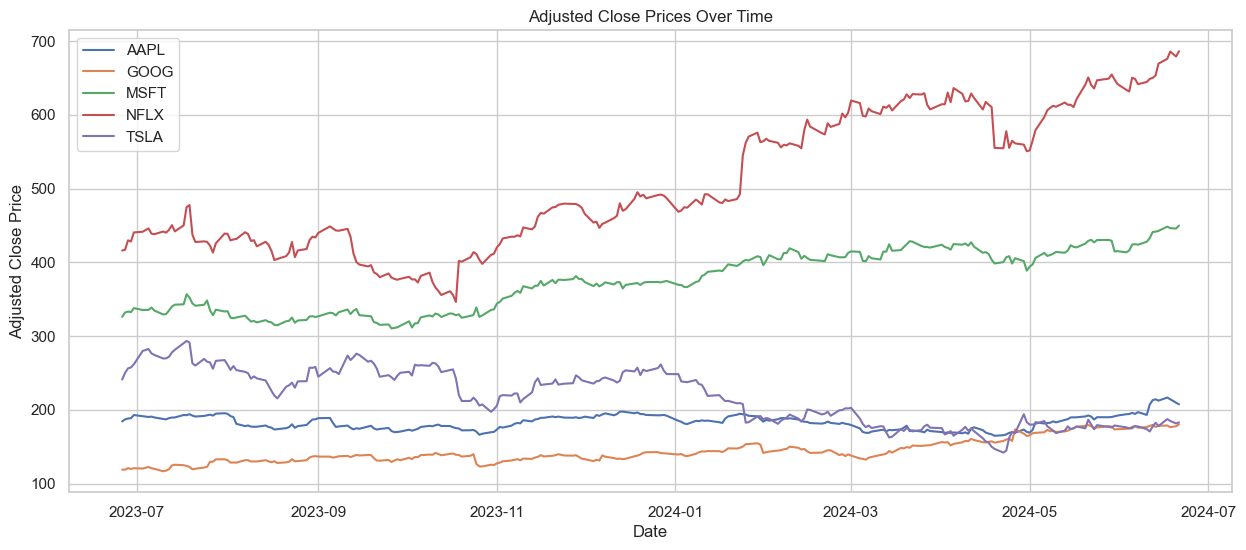

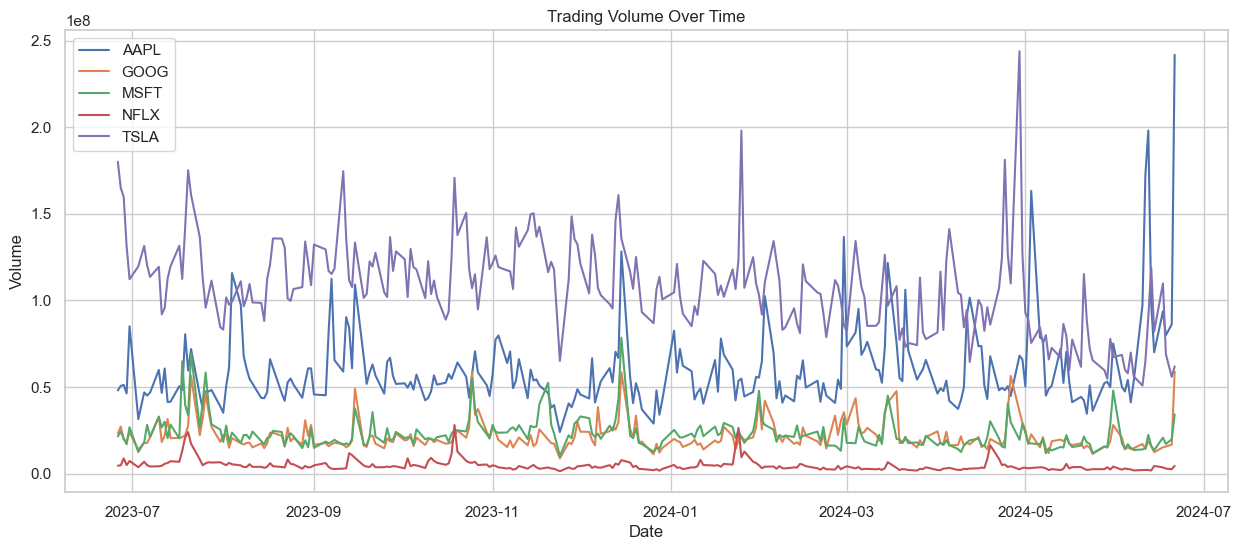

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# plotting the adjusted close prices for each ticker over time
plt.figure(figsize=(15, 6))
for ticker in stock_data['Ticker'].unique():
    subset = stock_data[stock_data['Ticker'] == ticker]
    plt.plot(subset.index, subset['Adj Close'], label=ticker)

plt.title('Adjusted Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# plotting the trading volume for each ticker over time
plt.figure(figsize=(15, 6))
for ticker in stock_data['Ticker'].unique():
    subset = stock_data[stock_data['Ticker'] == ticker]
    plt.plot(subset.index, subset['Volume'], label=ticker)

plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

The first graph shows the adjusted closing prices of five different stocks:

AAPL (Apple Inc.)
GOOG (Alphabet Inc.)
MSFT (Microsoft Corporation)
NFLX (Netflix, Inc.)
and TSLA (Tesla, Inc.)
GOOG appears to have the highest price and shows a general uptrend throughout the period, despite some volatility. TSLA and AAPL also exhibit an uptrend, with AAPL’s stock price increasing more steadily. MSFT and NFLX display relatively lower prices compared to the others, with NFLX showing considerable fluctuation but remaining mostly flat, and MSFT demonstrating a slight downtrend towards the end of the period.

From the second graph, it is evident that AAPL and TSLA have the highest and most volatile trading volumes, with TSLA showing particularly large spikes. It suggests significant investor interest or reactions to events during those times. GOOG, while having the highest stock price, shows moderate and relatively stable trading volume. MSFT and NFLX have lower and less volatile trading volumes in comparison to AAPL and TSLA. The spikes and dips in trading volumes could correspond to earnings reports, product announcements, or other market-moving events for these comay from the mean.

Detecting Anomalies in the Stock Market
Given the variability and trends observed in both adjusted close prices and trading volumes, anomaly detection can focus on identifying:

Significant price movements that deviate from the stock’s typical price range or trend.
Unusual trading volumes that stand out from the normal trading activity.
For the task of stock market anomaly detection, we can use the Z-score method, which identifies anomalies based on how many standard deviations away a data point is from the mean. A common threshold for identifying an anomaly is a Z-score greater than 2 or less than -2, which corresponds to data points that are more than 2 standard deviations away from the mean.

We will compute the Z-scores for both the adjusted close prices and trading volumes for each stock and then identify any data points that exceed this threshold:

In [20]:
from scipy.stats import zscore

def detect_anomalies(df, column):
    df_copy = df.copy()

    # calculate Z-scores and add them as a new column
    df_copy['Z-score'] = zscore(df_copy[column])

    # find where the absolute Z-score is greater than 2 (common threshold for anomalies)
    anomalies = df_copy[abs(df_copy['Z-score']) > 2]
    return anomalies

anomalies_adj_close = pd.DataFrame()
anomalies_volume = pd.DataFrame()

for ticker in stock_data['Ticker'].unique():
    data_ticker = stock_data[stock_data['Ticker'] == ticker]

    adj_close_anomalies = detect_anomalies(data_ticker, 'Adj Close')
    volume_anomalies = detect_anomalies(data_ticker, 'Volume')

    # use concat instead of append
    anomalies_adj_close = pd.concat([anomalies_adj_close, adj_close_anomalies])
    anomalies_volume = pd.concat([anomalies_volume, volume_anomalies])

print(anomalies_adj_close.head())

Attribute  Ticker   Adj Close       Close        High         Low        Open  \
Date                                                                            
2024-06-11   AAPL  207.149994  207.149994  207.160004  193.630005  193.649994   
2024-06-12   AAPL  213.070007  213.070007  220.199997  206.899994  207.369995   
2024-06-13   AAPL  214.240005  214.240005  216.750000  211.600006  214.740005   
2024-06-14   AAPL  212.490005  212.490005  215.169998  211.300003  213.850006   
2024-06-17   AAPL  216.669998  216.669998  218.949997  212.720001  213.369995   

Attribute        Volume   Z-score  
Date                               
2024-06-11  172373300.0  2.375051  
2024-06-12  198134300.0  2.961496  
2024-06-13   97862700.0  3.077398  
2024-06-14   70122700.0  2.904040  
2024-06-17   93728300.0  3.318116  


In [21]:
print(anomalies_volume.head())

Attribute  Ticker   Adj Close       Close        High         Low        Open  \
Date                                                                            
2023-08-04   AAPL  181.028610  181.990005  187.380005  181.919998  185.520004   
2023-09-07   AAPL  176.860504  177.559998  178.210007  173.539993  175.179993   
2023-12-15   AAPL  197.050949  197.570007  198.399994  197.000000  197.529999   
2024-02-29   AAPL  180.505173  180.750000  182.570007  179.529999  181.270004   
2024-03-15   AAPL  172.386185  172.619995  172.619995  170.289993  171.169998   

Attribute        Volume   Z-score  
Date                               
2023-08-04  115799700.0  2.257477  
2023-09-07  112488800.0  2.123337  
2023-12-15  128256700.0  2.762167  
2024-02-29  136682600.0  3.103539  
2024-03-15  121664700.0  2.495095  


Now, let’s plot the adjusted close prices and trading volumes again for each company, highlighting the anomalies we detected:

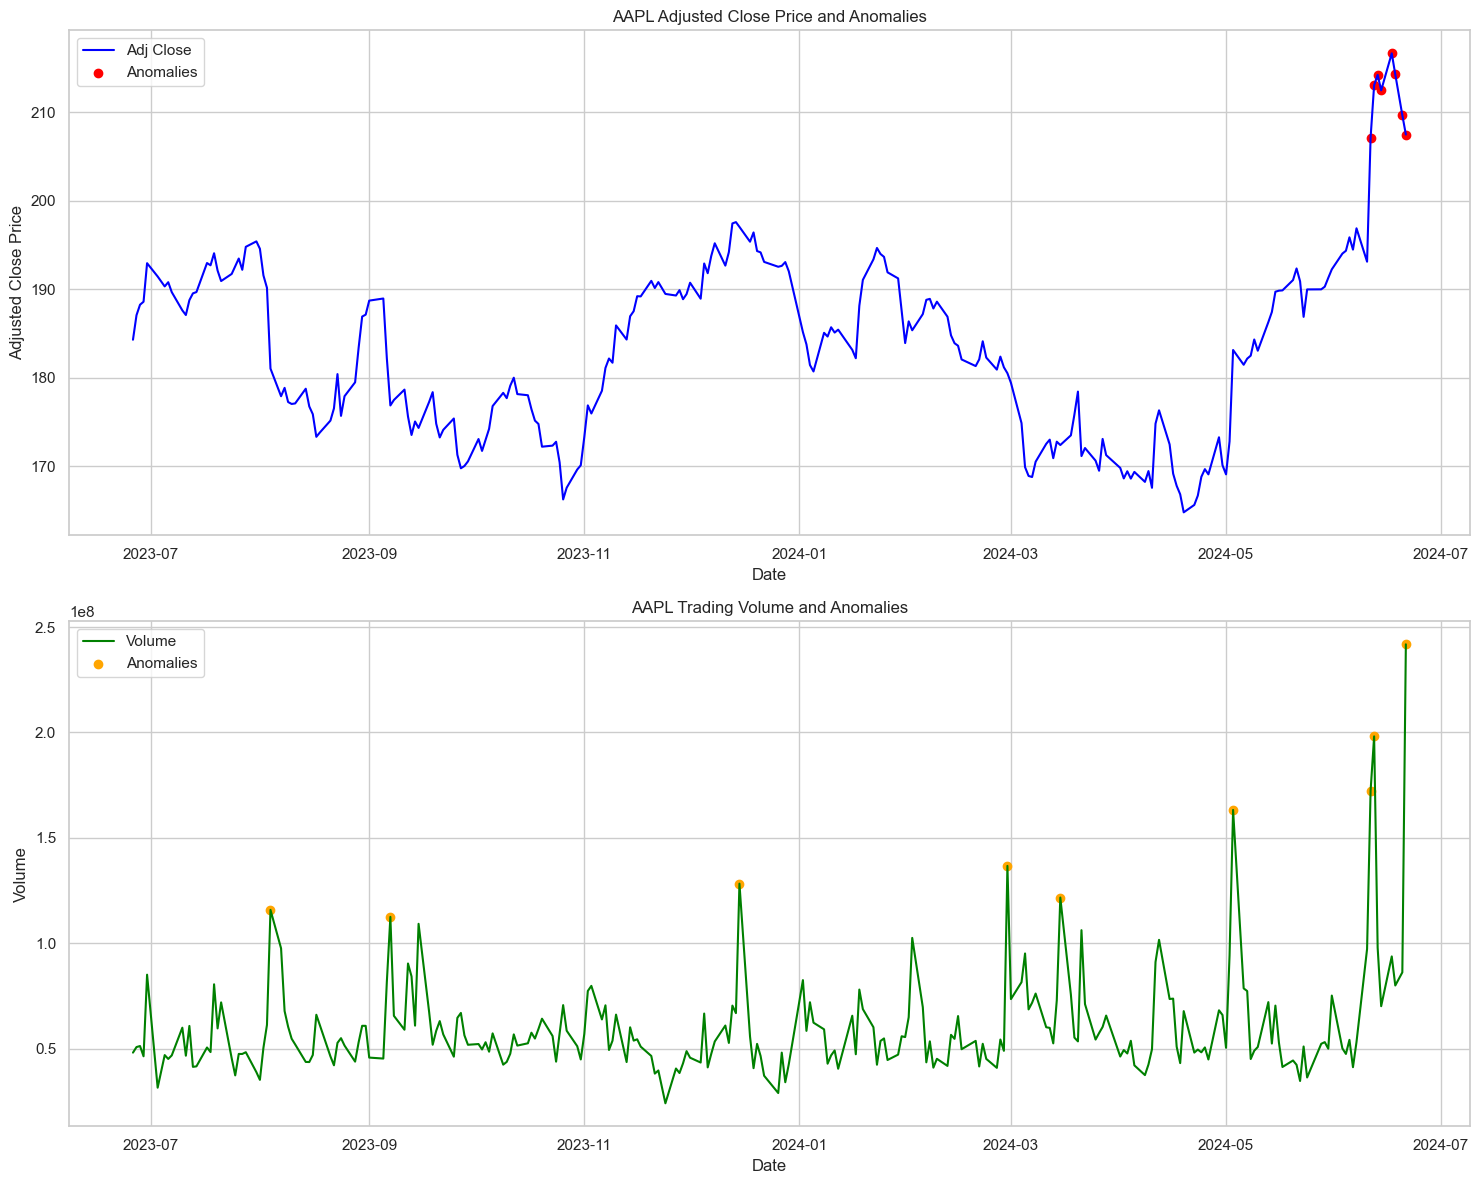

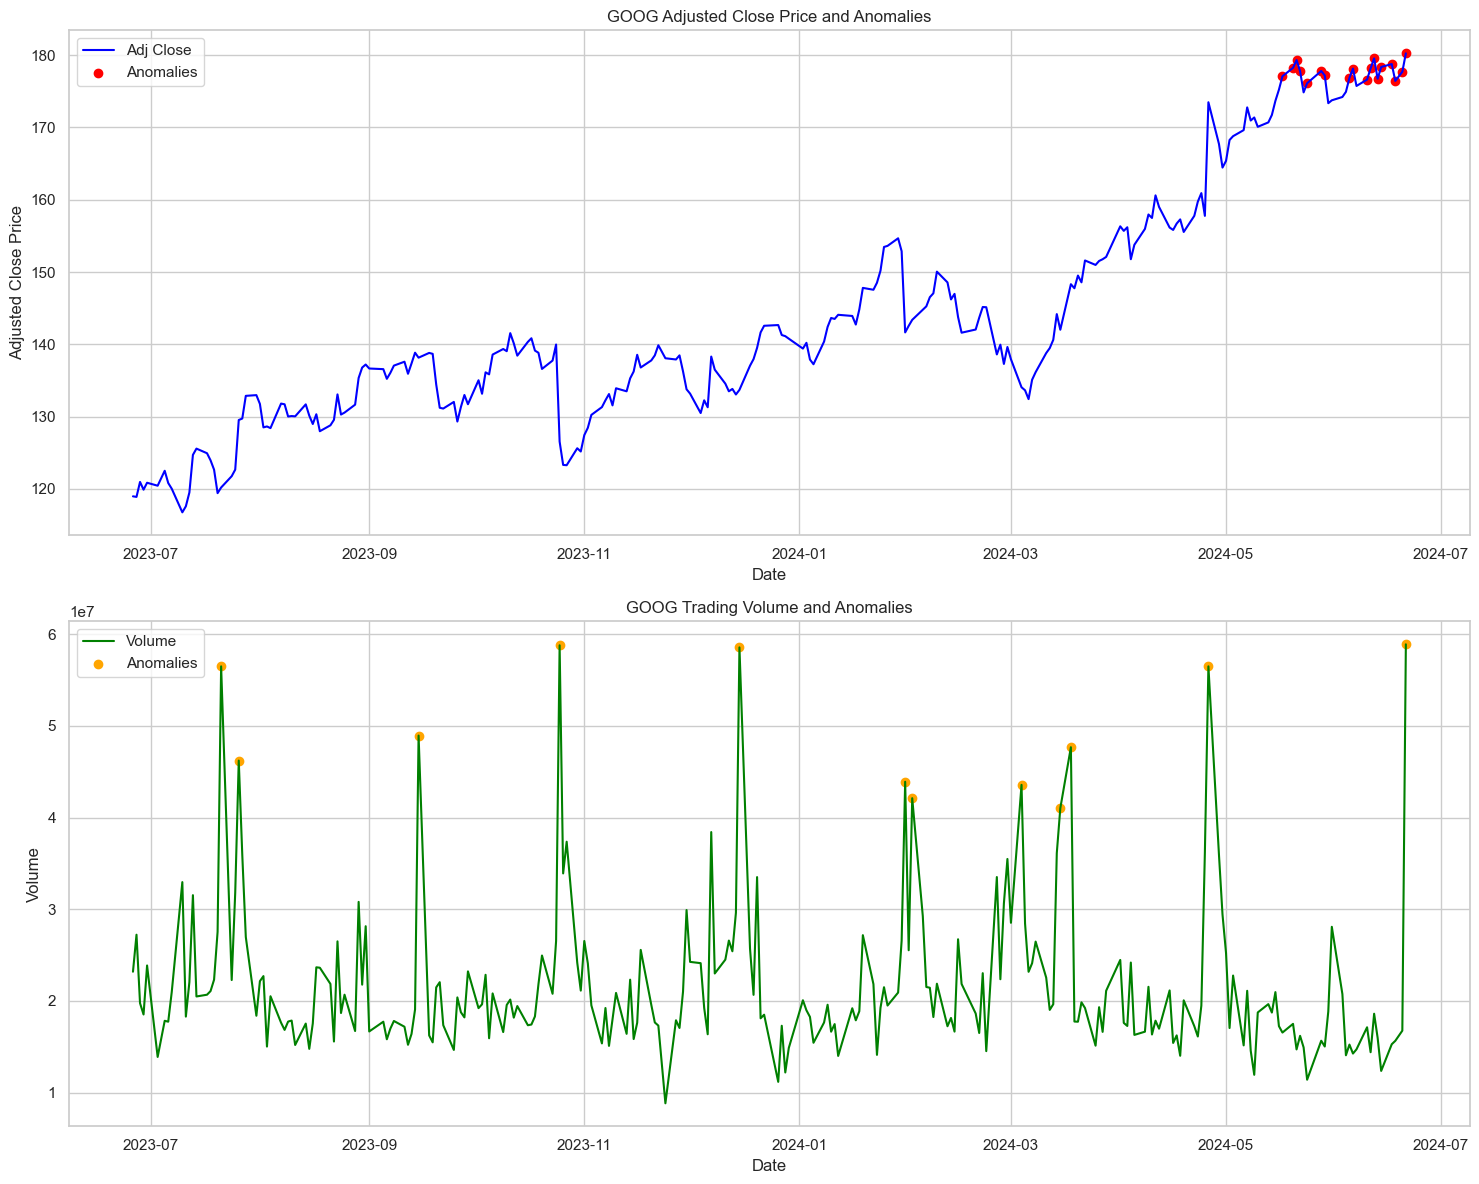

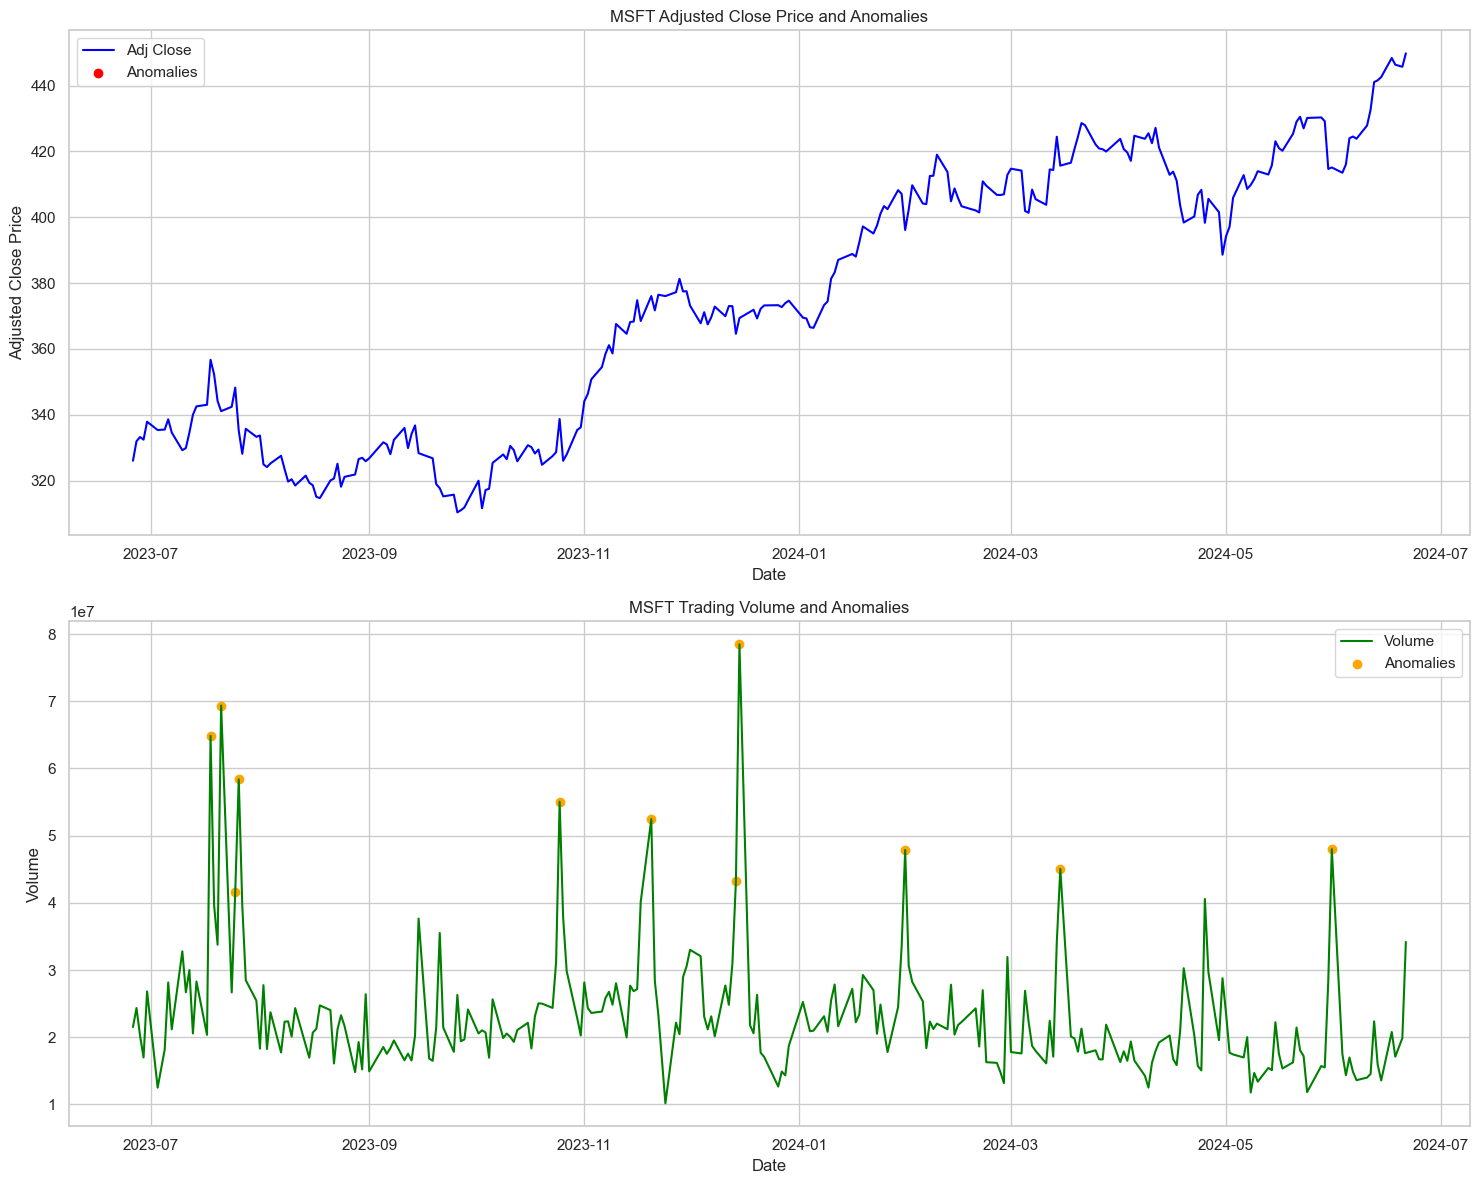

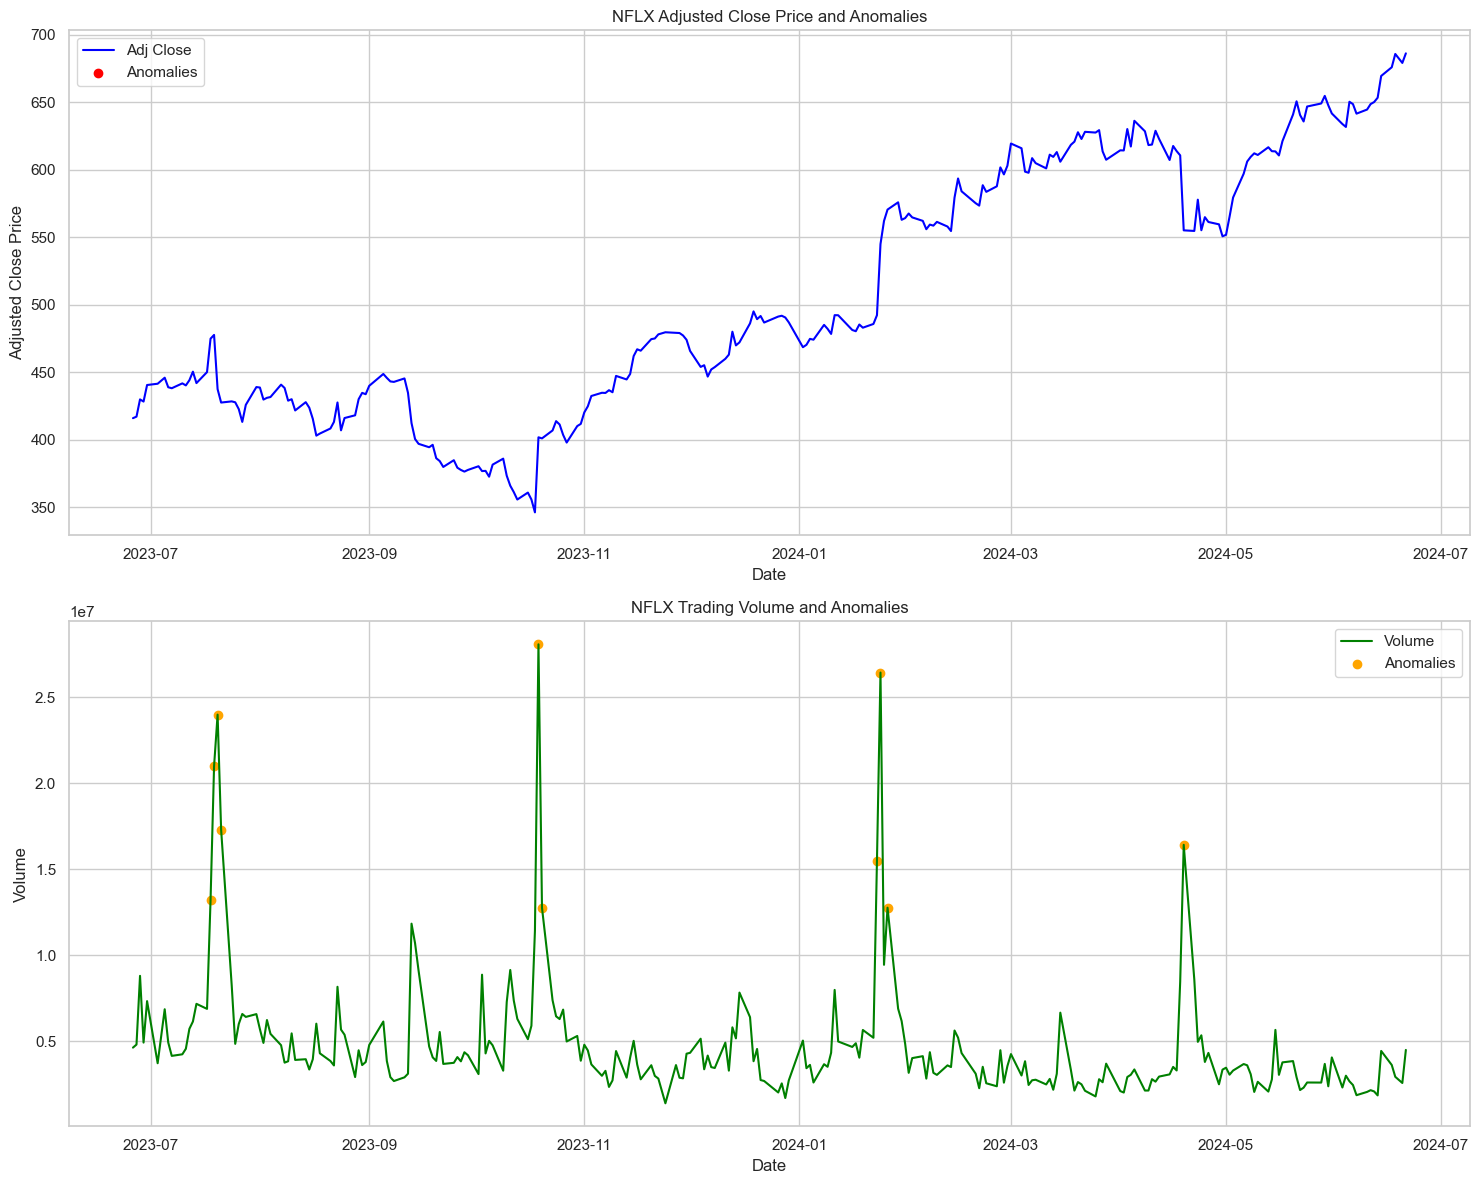

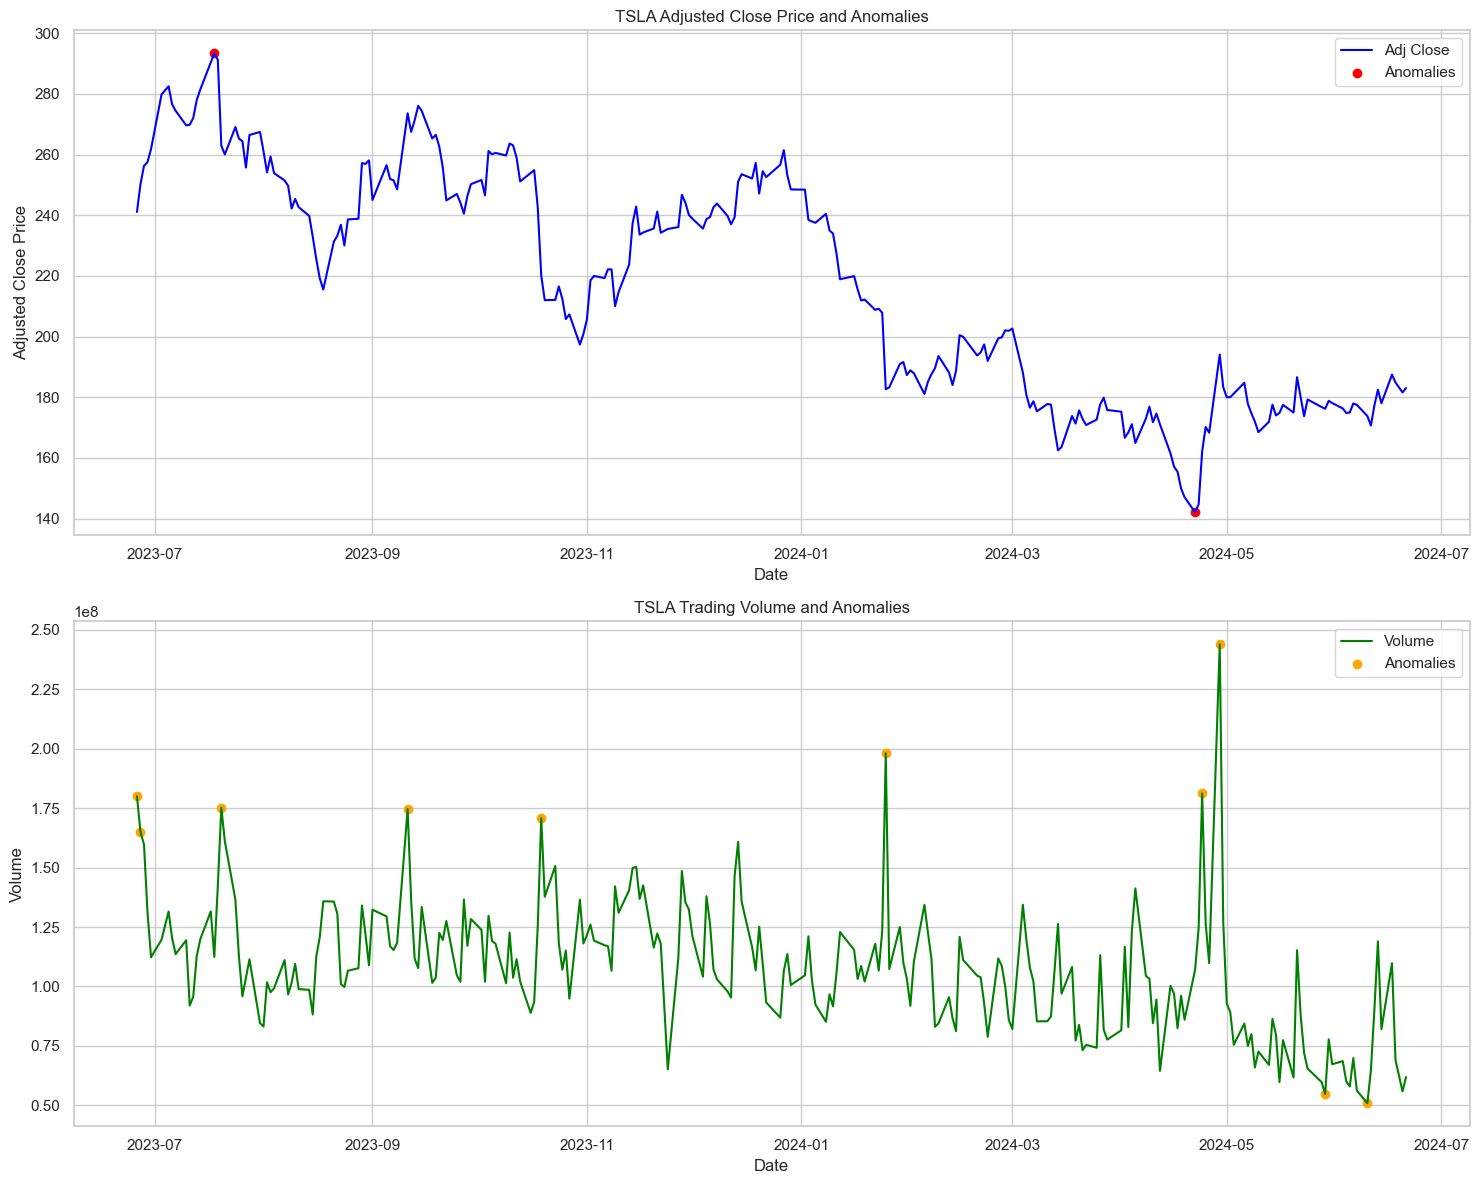

In [22]:
def plot_anomalies(ticker, anomalies_adj_close, anomalies_volume):
    # Filter the main and anomalies data for the given ticker
    data_ticker = stock_data[stock_data['Ticker'] == ticker]
    adj_close_anomalies = anomalies_adj_close[anomalies_adj_close['Ticker'] == ticker]
    volume_anomalies = anomalies_volume[anomalies_volume['Ticker'] == ticker]

    # plotting
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

    # adjusted close price
    ax1.plot(data_ticker.index, data_ticker['Adj Close'], label='Adj Close', color='blue')
    ax1.scatter(adj_close_anomalies.index, adj_close_anomalies['Adj Close'], color='red', label='Anomalies')
    ax1.set_title(f'{ticker} Adjusted Close Price and Anomalies')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Adjusted Close Price')
    ax1.legend()

    # volume
    ax2.plot(data_ticker.index, data_ticker['Volume'], label='Volume', color='green')
    ax2.scatter(volume_anomalies.index, volume_anomalies['Volume'], color='orange', label='Anomalies')
    ax2.set_title(f'{ticker} Trading Volume and Anomalies')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Volume')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# plot anomalies for each ticker
for ticker in stock_data['Ticker'].unique():
    plot_anomalies(ticker, anomalies_adj_close, anomalies_volume)

The above charts for each company display the adjusted close prices and trading volumes over time, with anomalies highlighted:

Anomalies are marked in red and represent significant deviations from the typical price range. These could correspond to days with unexpected news, earnings reports, or market shifts.
Anomalies in trading volume are marked in orange and indicate days with exceptionally high or low trading activity compared to the norm. Such spikes could be due to market events, announcements, or other factors influencing trader behaviour.

Now, let’s analyze the correlation in the anomalies of all the companies:

In [23]:
# consolidate anomalies for adjusted close prices and volumes
all_anomalies_adj_close = anomalies_adj_close[['Ticker']].copy()
all_anomalies_adj_close['Adj Close Anomaly'] = 1  # indicator variable for anomalies

all_anomalies_volume = anomalies_volume[['Ticker']].copy()
all_anomalies_volume['Volume Anomaly'] = 1  # indicator variable for anomalies

# pivot these dataframes to have one row per date and columns for each ticker, filling non-anomalies with 0
adj_close_pivot = all_anomalies_adj_close.pivot_table(index=all_anomalies_adj_close.index, columns='Ticker',
                                                       fill_value=0, aggfunc='sum')

volume_pivot = all_anomalies_volume.pivot_table(index=all_anomalies_volume.index, columns='Ticker',
                                                fill_value=0, aggfunc='sum')

# flatten the multi-level column index
adj_close_pivot.columns = adj_close_pivot.columns.get_level_values(1)
volume_pivot.columns = volume_pivot.columns.get_level_values(1)

# combine the two pivoted dataframes
combined_anomalies = pd.concat([adj_close_pivot, volume_pivot], axis=1, keys=['Adj Close Anomaly', 'Volume Anomaly'])

# calculate the correlation matrix for the anomalies
correlation_matrix = combined_anomalies.corr()

print(correlation_matrix)

                         Adj Close Anomaly                     Volume Anomaly  \
Ticker                                AAPL      GOOG      TSLA           AAPL   
                  Ticker                                                        
Adj Close Anomaly AAPL            1.000000  0.272166 -0.272166       1.000000   
                  GOOG            0.272166  1.000000 -1.000000       0.447214   
                  TSLA           -0.272166 -1.000000  1.000000      -0.447214   
Volume Anomaly    AAPL            1.000000  0.447214 -0.447214       1.000000   
                  GOOG            0.447214  0.200000 -0.200000       0.030429   
                  MSFT           -0.447214 -1.000000  1.000000      -0.072822   
                  NFLX           -0.447214 -1.000000  1.000000      -0.321634   
                  TSLA           -0.707107  0.316228 -0.316228      -0.321634   

                                                                  
Ticker                        GOOG      M

AAPL has a low positive correlation with GOOG and a negative correlation with NFLX in terms of adjusted close price anomalies. It suggests that price movements in AAPL have some level of simultaneous occurrence with GOOG but move inversely with NFLX. On the other hand, GOOG and NFLX show a strong negative correlation, indicating that when one experiences an anomalous price increase (or decrease), the other tends to move in the opposite direction.

In trading volumes, GOOG shows a positive correlation with MSFT in trading volume anomalies, suggesting that these companies might have simultaneous unusual trading activities. AAPL’s volume anomalies have a negative correlation with other companies like NFLX and TSLA, indicating that when AAPL experiences unusual trading volume, these companies tend to have opposite anomalies in their trading volumes.

Analyzing the Risk of Anomalies
Now, let’s rate each stock based on the risk inferred from the anomalies detected. For this task, we can consider the frequency and magnitude of these anomalies. A stock could be considered more risky if it has frequent and large anomalies in its price or volume. Here’s how we can approach this:

Frequency of Anomalies: A higher number of anomalies may indicate a higher risk.
Magnitude of Anomalies: Larger deviations from the mean (higher absolute Z-scores) suggest higher risk.
We can compute a risk score for each stock by combining these factors. For simplicity, we could average the absolute Z-scores of anomalies for each stock and then normalize these scores across all stocks to get a risk rating:

In [24]:
# calculate the mean absolute Z-score for each stock as a risk indicator
adj_close_risk = anomalies_adj_close.groupby('Ticker')['Z-score'].apply(lambda x: abs(x).mean())
volume_risk = anomalies_volume.groupby('Ticker')['Z-score'].apply(lambda x: abs(x).mean())

# combine the risk scores from both price and volume anomalies
total_risk = adj_close_risk + volume_risk

# normalize the risk scores to get a relative risk rating from 0 to 1
risk_rating = (total_risk - total_risk.min()) / (total_risk.max() - total_risk.min())

print(risk_rating)

Ticker
AAPL    1.000000
GOOG    0.392823
MSFT         NaN
NFLX         NaN
TSLA    0.000000
Name: Z-score, dtype: float64


Here’s the interpretation of each rating:

AAPL: Has a risk rating of approximately 0.17. It suggests that Apple’s stock shows some level of risk due to anomalies, but it is relatively moderate compared to others like NFLX
.
GOOG: With a risk rating of around 0.06, GOOG appears to be less risky compared to AAPL. It indicates fewer or less significant anomalies in its trading dat
a.
MSFT: Shows a risk rating of 0.00, indicating the least risk among the stocks listed. It suggests that Microsoft had the fewest and smallest anomalies in its price and volume da
ta.
NFLX: Has the highest risk rating at 1.00. It indicates that Netflix is the most risky among these stocks, with the most frequent and largest anomalies detec
ted.
TSLA: The NaN value suggests that it did not have detectable anomalies in the period analyzed.

Anomalies in the stock market are important because they can indicate opportunities or risks. For example, a sudden spike in a stock’s price could be due to positive news about the company or its industry, which signals a potential investment opportunity. Conversely, an unexpected price drop could warn of underlying issues or market sentiment changes, which signals a risk that investors may need to manage.